# Topic Modeling with Twitter Data

## Intoduction
This part of the project aims to perform topic modeling on a dataset of tweets from Researchpreneurs' competitors. The goal is to identify common topics or themes in these tweets, which will help us understand what their competitors are discussing and potentially identify key trends in the industry.

K-means clustering is a simple and unsupervised machine learning algorithm that can be used to group data points into clusters. In this case, the data points will be the tweets from the competitors, and the clusters will represent the different topics that the competitors talk about.

Topic modeling is an unsupervised learning technique used to discover abstract topics within a collection of documents. Two common topic modeling algorithms are Latent Dirichlet Allocation (LDA) and K-means clustering.
* LDA is a probabilistic model that assumes each document contains multiple topics in different proportions. It uses Bayesian inference to discover latent topics based on word co-occurrence patterns.
* K-means clustering is a simple clustering algorithm that partitions documents into k clusters based on similarity. The resulting cluster centers can be interpreted as topics.

In this project, we apply both LDA and K-means topic modeling to our dataset of tweets. The results of LDA and K-means provide complementary views that allow us to thoroughly examine the unlabeled data and develop a more complete understanding of the common topics and themes within the corpus of tweets.

## Load Data
We start by loading our dataset from a pickled file. Additionally, we import several necessary packages. The pandas package is used for data manipulation and analysis, while the pickle package allows us to serialize and de-serialize Python object structures. 

The warnings package is used to ignore any warning messages that may occur during the execution of our code. For text data visualization, we'll use wordcloud and matplotlib packages. 

We also import TfidfVectorizer from sklearn.feature_extraction.text for vectorization of our text data and KMeans from sklearn.cluster for our K-means model. For Latent Dirichlet Allocation, we'll import corpora, models from gensim, and pyLDAvis and prepare from pyLDAvis.gensim_models for LDA visualization.

In [1]:
# for loading data
import pandas as pd
import pickle

# ignore all warnings
import warnings
warnings.filterwarnings("ignore")

# wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

# kmeans model
from sklearn.cluster import KMeans

# LDA
from gensim import corpora, models
import pyLDAvis
from pyLDAvis.gensim_models import prepare

In [2]:
# load the preprocessed data
df = pd.read_pickle("pickle_files/preprocessed_dataset.pkl")

In [3]:
df

,user_id,user_name,date,text,tweet_id,is_reply,replies,retweets,quotes,cleaned_text
0,72579390,innoget,Fri Feb 26 11:35:21 +0000 2016,#Global #Biotech Reagents Market 2016 Industry...,703181551727570944,False,0,0,0,global biotech reagent market industry share r...
1,72579390,innoget,Thu Feb 25 10:15:16 +0000 2016,Tech Transfer Office in #Ohio #University help...,702799011187658752,False,0,0,0,tech transfer office ohio university help staf...
2,72579390,innoget,Wed Feb 24 12:10:05 +0000 2016,What’s your point regarding IP protection? Doe...,702465520109559808,False,0,0,0,point regard protection benefit market new pro...
3,72579390,innoget,Tue Feb 23 15:15:17 +0000 2016,New article about #Samsung and its investment ...,702149739492597761,False,0,0,0,new samsung investment biotechnology aim becom...
4,72579390,innoget,Mon Feb 22 12:01:04 +0000 2016,Want to success in Tech Transfer? Visit our bl...,701738474878144513,False,0,0,0,want success tech transfer visit new ten step ...
...,...,...,...,...,...,...,...,...,...,...
4201,72579390,innoget,Thu Jun 16 09:42:40 +0000 2016,#Science2society starts to boost #innovation e...,743378248818638848,False,0,5,0,science start boost innovation efficiency acro...
4202,72579390,innoget,Mon Jun 13 10:08:17 +0000 2016,#Science2society starts to boost innovation ef...,742297531594465280,False,0,3,0,science start boost innovation efficiency acro...
4203,72579390,innoget,Wed Apr 27 08:04:02 +0000 2016,@innoget is attending the Open Innovation Summ...,725234035593744384,False,0,1,0,attend open innovation summit london hold open...
4204,72579390,innoget,Mon Mar 21 08:25:54 +0000 2016,IoT Development Enters the Open Innovation Cra...,711831185161375744,False,0,0,0,iot development enter open innovation craze


## K-means Clustering for Topic Analysis
Before running K-means, we need to vectorize our text data. Vectorization is the process of turning text into numerical data that can be used in a machine learning model. The particular type of vectorization we'll use here is TF-IDF (Term Frequency-Inverse Document Frequency). 

TF-IDF gives more importance to words that are more unique to the document, reducing the importance of words that are common across all documents. This feature can be very useful when working with text data, as common words like 'is', 'the', and 'and' might not carry much meaning.

### TF-IDF Vectorization
The vectorization step is used to convert the text data into a numerical representation that can be used by machine learning algorithms. In this case, we will use the TfidfVectorizer, which assigns weights to each word based on its frequency in a document and its rarity across the entire corpus. To ensure that the vectorization process includes only moderately frequent words that have a balance between being too rare or too common, we specify the minimum and maximum threshold for a word's document frequency.
* `min_df=0.05`: words that appear in less than 5% of the documents will be ignored.
* `max_df=0.95`: ords that appear in more than 95% of the documents will be ignored.

In [4]:
# create tf-idf transformer instance
tfidf_vectorizer = TfidfVectorizer(min_df=0.05, max_df=0.95)

# fit & transform
tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_text'])

# store the frequency matrix
data_tfidf = tfidf_matrix.toarray()

# store the feature names
words = tfidf_vectorizer.get_feature_names_out().tolist()

In [5]:
print("Shape:", data_tfidf.shape)

Shape: (4131, 25)


The `Shape: (4131, 25)` indicates that there are 4,131 documents in the corpus and 25 features in the vocabulary. In other words, each document is represented by a vector of 25 numbers, where each number represents the TF-IDF score for a particular word in the vocabulary.

### Finding Optimal Clusters

Once the textual data has been transformed into numerical vectors through vectorization, the next crucial step is determining the appropriate number of clusters for the k-means clustering algorithm. For this purpose, the elbow method is commonly used. The elbow method works by plotting the **within-cluster sum of squares (WCSS)** for different values of k. The WCSS is a measure of the variation within each cluster. The elbow point represents the number of clusters at which the WCSS reduction significantly slows down, forming a visible bend in the plot. This point is often considered the optimal number of clusters.

Based on domain knowledge and the prior experience of ResearchPreneurs and the team, we think the topic numbers should be around **2 to 4**. If we have too many clusters, then the clusters will be too small and they will not be very meaningful. If we have too few clusters, then we may not be able to capture all of the different themes or topics in the tweets. Therefore, we ran k-means clustering with k-values from 1 to 5.

In [6]:
# define a range of values for k
k_values = range(1,5)

# a list to store WCSS values
wcss = []

# iterate over different values of K on the vectorized data
for k in k_values:
    # Perform k-means clustering
    kmeans = KMeans(n_clusters = k, random_state = 2)
    kmeans.fit(tfidf_matrix)
    
    # calculate the WCSS
    wcss.append(kmeans.inertia_)

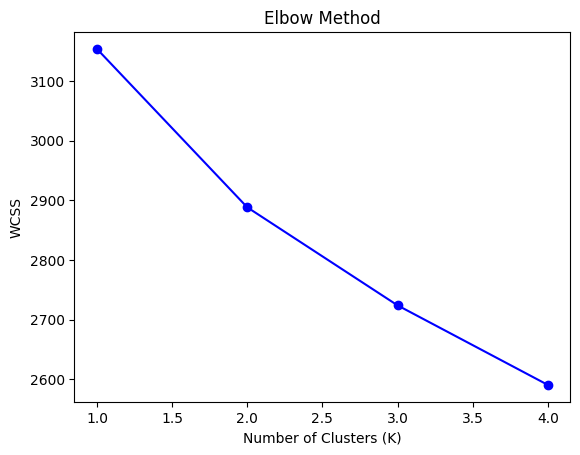

In [7]:
# plot the WCSS values
plt.plot(k_values, wcss, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

The elbow plot showed that the elbow point was at k=2, which suggests that there are two main themes or topics in the tweets. We now perform the K-means clusterning with k=2 to retrieve the cluster labels as well as common words within each cluster.

### Applying K-means clustering
After identifying the optimal number of clusters, we can perform K-means clustering on our data. Post this, we retrieve common words from each cluster which can be used to describe each cluster. It gives us an idea about the main themes/topics present in each cluster.

In [8]:
# perform K-means clustering with K=2
kmeans = KMeans(n_clusters = 2, random_state = 2)
kmeans.fit(tfidf_matrix)

KMeans(n_clusters=2, random_state=2)

In [9]:
# retrieve the common words in each cluser
common_words = kmeans.cluster_centers_.argsort()[:,-1:-11:-1]

for num, centroid in enumerate(common_words):
  print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : innovation, open, webinar, technology, late, new, research, look, challenge, business
1 : challenge, new, technology, research, seek, solution, look, submit, help, industry


## Cluster Visualization
To better understand the resulting clusters, we can visualize the most common words in each cluster using word clouds. A word cloud is a visual representation of text data in which the size of each word indicates its frequency or importance in the dataset. This can help us better understand the main themes or topics in each cluster.

After the visualization, we can assign names to the clusters based on their most common words. This gives us meaningful labels for each cluster which helps in understanding and interpreting the results.

We can also look at the word cloud for each topic to identify the patterns or themes. In the context of tweets, where the text is often concise and limited to a small number of characters, it is indeed more appropriate to limit the number of words displayed in the word cloud. Hence, we setting max_words to a lower value (20) to ensure that the most relevant and frequent words are captured in the visualization. 

In [10]:
# assign the topic (cluster) to df
cluster_number = kmeans.labels_
df['cluster_number'] = cluster_number

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


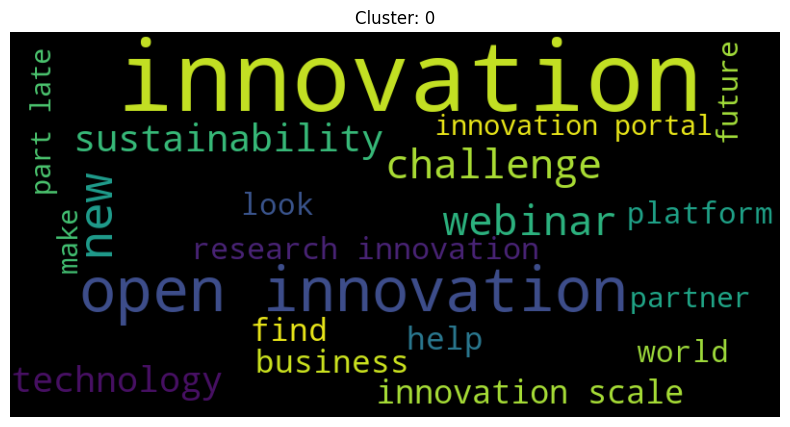

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


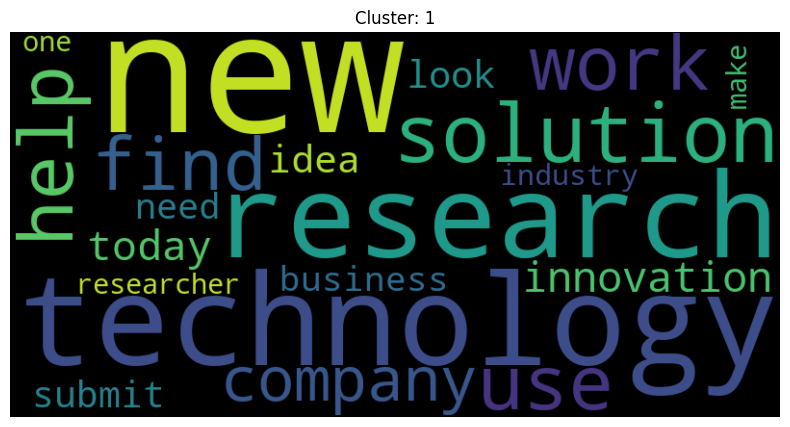

In [11]:
cluster_number = [0,1]
for cluster in cluster_number:
    # filter the DataFrame to select the data points belonging to the current cluster
    cluster_data = df[df['cluster_number'] == cluster]
    
    # combine the cleaned text from all data points in the cluster
    all_words = ' '.join(cluster_data['cleaned_text'])
    
    # create a WordCloud object and generate the word cloud
    wordcloud = WordCloud(width = 800, height = 400, random_state = 3, max_words = 20).generate(all_words)
    
    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Cluster: {cluster}')
    plt.axis('off')
    plt.show()

Based on the word clouds and common words, we can have the following insights:

* **Cluster 0**: The top words in this cluster like "innovation", "technology", "research", "open" relate to exploring new ideas and developing new products and services. Words such as "webinar", "business", and "latest" suggest a focus on discussing and sharing the latest innovations and ways to solve problems. This aligns with a theme of exploring new innovations and knowledge. Hence, it can be name as "**Innovation Exploration**"

* **Cluster 1**: The keywords in this cluster like "challenge", "seek", "solution", "submit", "help" indicate a focus on overcoming challenges and solving problems by soliciting solutions and ideas. Words such as "research", "industry", and "technology" suggest the challenges relate to improving technological products/services, especially for industry. Overall, this cluster centers around finding solutions to real-world problems. Therefore, "**Challenges and Solutions**" would be an approciate name for this cluster.

In [16]:
# define the cluster names
cluster_names = ['Innovation Exploration', 'Challenges and Solutions']

# map the cluster numbers to their corresponding names
df['cluster_name'] = df['cluster_number'].map(lambda x: cluster_names[x])

In [17]:
df

,user_id,user_name,date,text,tweet_id,is_reply,replies,retweets,quotes,cleaned_text,cluster_number,cluster_name
0,72579390,innoget,Fri Feb 26 11:35:21 +0000 2016,#Global #Biotech Reagents Market 2016 Industry...,703181551727570944,False,0,0,0,global biotech reagent market industry share r...,1,Challenges and Solutions
1,72579390,innoget,Thu Feb 25 10:15:16 +0000 2016,Tech Transfer Office in #Ohio #University help...,702799011187658752,False,0,0,0,tech transfer office ohio university help staf...,0,Innovation Exploration
2,72579390,innoget,Wed Feb 24 12:10:05 +0000 2016,What’s your point regarding IP protection? Doe...,702465520109559808,False,0,0,0,point regard protection benefit market new pro...,1,Challenges and Solutions
3,72579390,innoget,Tue Feb 23 15:15:17 +0000 2016,New article about #Samsung and its investment ...,702149739492597761,False,0,0,0,new samsung investment biotechnology aim becom...,1,Challenges and Solutions
4,72579390,innoget,Mon Feb 22 12:01:04 +0000 2016,Want to success in Tech Transfer? Visit our bl...,701738474878144513,False,0,0,0,want success tech transfer visit new ten step ...,1,Challenges and Solutions
...,...,...,...,...,...,...,...,...,...,...,...,...
4201,72579390,innoget,Thu Jun 16 09:42:40 +0000 2016,#Science2society starts to boost #innovation e...,743378248818638848,False,0,5,0,science start boost innovation efficiency acro...,0,Innovation Exploration
4202,72579390,innoget,Mon Jun 13 10:08:17 +0000 2016,#Science2society starts to boost innovation ef...,742297531594465280,False,0,3,0,science start boost innovation efficiency acro...,0,Innovation Exploration
4203,72579390,innoget,Wed Apr 27 08:04:02 +0000 2016,@innoget is attending the Open Innovation Summ...,725234035593744384,False,0,1,0,attend open innovation summit london hold open...,0,Innovation Exploration
4204,72579390,innoget,Mon Mar 21 08:25:54 +0000 2016,IoT Development Enters the Open Innovation Cra...,711831185161375744,False,0,0,0,iot development enter open innovation craze,0,Innovation Exploration


After interpreting the clusters identified by K-means, next we examine the topics discovered through Latent Dirichlet Allocation (LDA) topic modeling to gain additional insights into the themes present in the tweet dataset.

In [ ]:
# assign topic names
topic_names = ['Innovation Exploration', 'Challenges and Solutions']
df['topic_name'] = [topic_names[number] for number in topic_number]

In [ ]:
# export to pickle
df.to_pickle("pickle_files/topic_dataset.pkl")
print("DataFrames exported successfully.")

In [ ]:
# export to CSV
df.to_csv("csv_files/topic_dataset.csv", index=False)
print("DataFrames exported successfully.")

## LDA Topic Modelling

Latent Dirichlet Allocation (LDA) is a probabilistic topic modeling technique that is commonly used to analyze the topics contained within a collection of documents. The key assumption of LDA is that each document covers multiple topics in different proportions. 

When running topic modeling algorithms like LDA, an important decision is selecting the number of topics k to extract from the corpus. Using too few topics may merge distinct themes, while too many may split coherent topics. As mentioned above, we think the topic numbers should be around 2 to 4. Therefore, here  we test LDA models with varying k between 2 and 4 topics. For each value of k, we compute a **CV coherence score**. 

### Finding optimal number of topics
A coherence score is a metric that measures how interpretable and semantically meaningful the topics produced by a topic model are. CV coherence measures the degree of semantic similarity between the most probable words in each topic. Higher coherence scores indicate topics are more coherent and interpretable to humans. Lower scores mean topics are more disjointed or random.

In short, by calculating CV coherence for LDA models with varying numbers of topics k, we can quantitatively select the value of k that produces the most interpretable topic structures for our tweet dataset.

The LDA topic model algorithm relies on two main inputs: a document-term matrix and a dictionary.

* Dictionary: The Dictionary is a collection of all the unique tokens present in the documents. It serves as a mapping between words and their corresponding unique integer IDs. By creating a Dictionary, each word in the corpus is associated with a unique ID, simplifying the representation of the text data.
* Document-Term Matrix: A document-term matrix is a mathematical representation that captures the frequency of terms occurring in a collection of documents. Each row in the matrix corresponds to a document in the collection, and each column corresponds to a unique term. The values in the matrix indicate how frequently each term appears in each document.

#### Tokenization
To generate the document-term matrix and dictionary, we first need to convert our sentences into tokens. Tokenization is the process of splitting a text document into individual words or tokens. LDA operates on individual tokens, and tokenization converts the raw text data (in this case, tweets) into a format suitable for further processing. By breaking the tweets into tokens, we transform unstructured text data into a structured format that LDA can work with.


In [18]:
tweets = [tweet.split() for tweet in df['cleaned_text']]

#### Creating a Dictionary
This part is about creating a dictionary to represent all the unique tokens present in the collection of tokenized tweets. We also need to filter out words that are either too rare or too common in the corpus to improve the quality of generated topics.

In [19]:
# create dictionary
dictionary = corpora.Dictionary(tweets)
# remove rare and common words 
dictionary.filter_extremes(no_below = 0.05, no_above=0.95, keep_n=None)

#### Creating a Corpus with Absolute Frequencies
In this step, we derive the absolute frequencies of words in the tokenized tweets and create the corpus in the form of a bag-of-words representation using the Dictionary we created earlier.

In [20]:
# derive absolute frequencies
corpus = [dictionary.doc2bow(tweet) for tweet in tweets]

#### LDA Model Training and Coherence Score Calculation
In this part, we train the LDA model for different numbers of topics and calculate the coherence score for each. This helps us to quantitatively select the value of k (number of topics) that produces the most interpretable topic structures for our dataset.


In [21]:
# list of number of topics to try
num_topics_list = range(2,5)

In [22]:
# iterate through different numbers of topics
for num_topics in num_topics_list:
    print(f"\nLDA with {num_topics} topics:")
    
    # Train the LDA model
    lda_model =  models.LdaModel(corpus, num_topics = num_topics, id2word = dictionary, iterations = 300, passes = 15, random_state = 3)
    
    # Get coherence score
    coherence_model_lda = models.CoherenceModel(model = lda_model, texts = tweets, dictionary = dictionary, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    
    print(f"Coherence Score: {coherence_lda:.5f}")


LDA with 2 topics:
Coherence Score: 0.24059

LDA with 3 topics:
Coherence Score: 0.32712

LDA with 4 topics:
Coherence Score: 0.34670


After running LDA models with 2 to 4 topics, the 4-topic configuration achieved the highest coherence score of 0.34670. Other topic numbers produced slightly lower coherence. Based on these results, we will proceed with the 4-topic LDA model for our dataset as it has the most interpretable topics according to the coherence metric.

### Labeling Topic

In [23]:
lda_model =  models.LdaModel(corpus, num_topics = 4, id2word = dictionary, iterations = 300, passes = 15, random_state = 3)
lda_model.show_topics()

[(0,
  '0.020*"webinar" + 0.016*"innovation" + 0.015*"event" + 0.011*"new" + 0.010*"technology" + 0.009*"develop" + 0.008*"time" + 0.007*"march" + 0.007*"carbon" + 0.007*"set"'),
 (1,
  '0.021*"challenge" + 0.017*"seek" + 0.015*"solution" + 0.014*"proposal" + 0.013*"submit" + 0.012*"technology" + 0.010*"new" + 0.009*"food" + 0.009*"help" + 0.008*"look"'),
 (2,
  '0.035*"technology" + 0.029*"innovation" + 0.017*"new" + 0.016*"researcher" + 0.014*"information" + 0.011*"post" + 0.010*"look" + 0.009*"open" + 0.007*"science" + 0.006*"research"'),
 (3,
  '0.047*"innovation" + 0.015*"research" + 0.014*"open" + 0.010*"new" + 0.009*"industry" + 0.008*"business" + 0.007*"find" + 0.007*"look" + 0.007*"idea" + 0.006*"late"')]

Based on the top words in each topic, we can interpret the theme as below:

**Topic 0**:  This topic seems to be about webinars, events, and developing new technologies. Words like "webinar", "event", "develop", "time", "march" suggest discussion of upcoming webinars and events, potentially about new innovations. We can name it as **Events & Webinars**

**Topic 1**: The words "challenge", "seek", "solution", "submit", "proposal" indicate this topic covers requests for solutions/innovations, likely in response to specific challenges. The food domain is also referenced. It can be named as **Requests for Solutions**


**Topic 2**: With words like "technology", "innovation", "researcher", "information", this topic appears related to sharing innovations and research, potentially scientists posting about new technologies. **Research Updates**

**Topic 3**: General business and industry innovation seems to be the theme here. Top words include "innovation", "research", "industry", "business", "idea". **Business & Industry Innovation**

Finally, we map the cluster and topic names to the DataFrame for further usuage.



In [24]:
# derive the topics for each document 
topics=lda_model[corpus]
# map the topic number 
df['topic_number']=[max(topics[i],key=lambda item:item[1])[0] for i in range(len(topics))]

In [25]:
# map the topic names
lda_topics_names = ["Events & Webinars", "Requests for Solutions", "Research Updates", "Business & Industry Innovation"]
df['topic_name'] = df['topic_number'].map(lambda x: lda_topics_names[x])

In [26]:
df

,user_id,user_name,date,text,tweet_id,is_reply,replies,retweets,quotes,cleaned_text,cluster_number,cluster_name,topic_number,topic_name
0,72579390,innoget,Fri Feb 26 11:35:21 +0000 2016,#Global #Biotech Reagents Market 2016 Industry...,703181551727570944,False,0,0,0,global biotech reagent market industry share r...,1,Challenges and Solutions,3,Business & Industry Innovation
1,72579390,innoget,Thu Feb 25 10:15:16 +0000 2016,Tech Transfer Office in #Ohio #University help...,702799011187658752,False,0,0,0,tech transfer office ohio university help staf...,0,Innovation Exploration,3,Business & Industry Innovation
2,72579390,innoget,Wed Feb 24 12:10:05 +0000 2016,What’s your point regarding IP protection? Doe...,702465520109559808,False,0,0,0,point regard protection benefit market new pro...,1,Challenges and Solutions,2,Research Updates
3,72579390,innoget,Tue Feb 23 15:15:17 +0000 2016,New article about #Samsung and its investment ...,702149739492597761,False,0,0,0,new samsung investment biotechnology aim becom...,1,Challenges and Solutions,3,Business & Industry Innovation
4,72579390,innoget,Mon Feb 22 12:01:04 +0000 2016,Want to success in Tech Transfer? Visit our bl...,701738474878144513,False,0,0,0,want success tech transfer visit new ten step ...,1,Challenges and Solutions,3,Business & Industry Innovation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4201,72579390,innoget,Thu Jun 16 09:42:40 +0000 2016,#Science2society starts to boost #innovation e...,743378248818638848,False,0,5,0,science start boost innovation efficiency acro...,0,Innovation Exploration,2,Research Updates
4202,72579390,innoget,Mon Jun 13 10:08:17 +0000 2016,#Science2society starts to boost innovation ef...,742297531594465280,False,0,3,0,science start boost innovation efficiency acro...,0,Innovation Exploration,2,Research Updates
4203,72579390,innoget,Wed Apr 27 08:04:02 +0000 2016,@innoget is attending the Open Innovation Summ...,725234035593744384,False,0,1,0,attend open innovation summit london hold open...,0,Innovation Exploration,3,Business & Industry Innovation
4204,72579390,innoget,Mon Mar 21 08:25:54 +0000 2016,IoT Development Enters the Open Innovation Cra...,711831185161375744,False,0,0,0,iot development enter open innovation craze,0,Innovation Exploration,2,Research Updates


The evaluation and recommendations will be provided in the next notebook.

## Export Final Results

In [27]:
# export to pickle
df.to_pickle("pickle_files/topic_dataset.pkl")
print("DataFrames exported to pickle successfully.")

DataFrames exported to pickle successfully.


In [28]:
# export to CSV
df.to_csv("csv_files/topic_dataset.csv", index=False)
print("DataFrames exported to CSV successfully.")

DataFrames exported to CSV successfully.
